In [1]:
#import necessary libraries
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/soumyankar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#load the dataset
pd.set_option('display.max_colwidth', None)
data = pd.read_csv('Steam Game Review.csv')
data.head(2)

,review_id,title,year,user_review,user_suggestion
0,1,Spooky's Jump Scare Mansion,2016.0,"I'm scared and hearing creepy voices. So I'll pause for a moment and write a review while I wait for my heart beat to return to atleast somewhat calmer times. This game is adorable and creepy like my happy tree friends but with the graphics sceme of my childhood (but more bubble and 'clean'). Hello 1990's.What charactes there are (that isnot trying to kill me) were likable and a bit odd. I did do a few noob things though, such as:Oh look a class room full of ghosts from dead children, lets shine my flashlight on them and stand there staring at them..Or, hmm creepy music, I'll turn around and see if I can see what's chasing me.Never before in a game have I been this afraid of finding a locked door.",1
1,2,Spooky's Jump Scare Mansion,2016.0,"Best game, more better than Sam Pepper's YouTube account. 10/10What you'll need to play:A computerSome extra pants.Pros:Scary as hell.Fun.Adventure.Spooky.Did I forgot to mention that its scary as hell?You'll get more pants/briefs in your wardrobe.Time consuming if you're bored.Cons:Buying pants/briefs. You haven't downloaded it yet.",1


In [3]:
#dataset facts
data.shape

(17494, 5)

In [4]:
#dataset facts
data['user_suggestion'].value_counts()

1    9968
0    7526
Name: user_suggestion, dtype: int64

In [5]:
#dataset facts
data['title'].nunique()

44

In [20]:
# Data processing for removing stop words, lemmatization and stemmming, and english-only.
# Importing all relevant libraries and functions here
import spacy #load spacy
from sklearn.pipeline import Pipeline # pipelining pre-processing
from spacy.lang.en import English
nlp = spacy.load("en_core_web_sm")
tokenizer = nlp.tokenizer

In [21]:
#tokenization
def create_tokenized_dataset(data):
    tokens_list = []

    for j in data['user_review']:
#         tokens_list.append(word_tokenize(j))
        spacy_tokens = [token.orth_ for token in tokenizer(j)]
        tokens_list.append(spacy_tokens)
    data['Tokens'] = tokens_list   
    return data

df = create_tokenized_dataset(data)
df.head(1)

,review_id,title,year,user_review,user_suggestion,Tokens,ProcessTokens
0,1,Spooky's Jump Scare Mansion,2016.0,"I'm scared and hearing creepy voices. So I'll pause for a moment and write a review while I wait for my heart beat to return to atleast somewhat calmer times. This game is adorable and creepy like my happy tree friends but with the graphics sceme of my childhood (but more bubble and 'clean'). Hello 1990's.What charactes there are (that isnot trying to kill me) were likable and a bit odd. I did do a few noob things though, such as:Oh look a class room full of ghosts from dead children, lets shine my flashlight on them and stand there staring at them..Or, hmm creepy music, I'll turn around and see if I can see what's chasing me.Never before in a game have I been this afraid of finding a locked door.",1,"[I, 'm, scared, and, hearing, creepy, voices, ., , So, I, 'll, pause, for, a, moment, and, write, a, review, while, I, wait, for, my, heart, beat, to, return, to, atleast, somewhat, calmer, times, ., , This, game, is, adorable, and, creepy, like, my, happy, tree, friends, but, with, the, graphics, sceme, of, my, childhood, (, but, more, bubble, and, ', clean, ', ), ., , Hello, 1990's, ., What, charactes, there, are, (, that, isnot, trying, to, kill, me, ), were, likable, and, a, bit, odd, ., , I, did, do, a, few, noob, things, though, ,, such, as, ...]","[scared, hearing, creepy, voice, pause, moment, write, review, wait, heart, beat, return, atleast, somewhat, calmer, time, game, adorable, creepy, like, happy, tree, friend, graphic, sceme, childhood, bubble, 'clean, hello, 1990's.what, charactes, isnot, trying, kill, likable, bit, odd, noob, thing, though, oh, look, class, room, full, ghost, dead, child, let, shine, flashlight, stand, staring, .., hmm, creepy, music, turn, around, see, see, chasing, me.never, game, afraid, finding, locked, door]"


In [22]:
#define lemmatizer
lemmatizer = WordNetLemmatizer()

In [23]:
#define stopwords
stopWords = set(stopwords.words('english'))
custom_stop = ["'m", "'ll", "'s", "'re", "n't", "'ve"]
stop_words = set(list(stopWords) + custom_stop)

In [24]:
#define punctuation
custom_punc = ["``", "''", "--", "..."]
punctuation = set(list(string.punctuation) + custom_punc)

In [25]:
#data preprocessing: define functions

#lower case
def lower_case(tokens):
    tokens = [token.lower() for token in tokens]
    return tokens

#remove stopwords
def remove_stopwords(tokens):
#     tokens = [token for token in tokens if token not in stop_words]
# Using the spacy stop words set instead of the english stop words
    tokens = [token for token in tokens if token not in nlp.Defaults.stop_words]
    return tokens

#remove digits
def remove_digits(tokens):
    for token in tokens:
        if token.isdigit():
            tokens.remove(token)
    return tokens

#remove punctuation
def remove_punctuation(tokens):
    tokens = [token for token in tokens if token not in punctuation]
    return tokens

#lemmatization
def lemmatize_words(tokens):
    for token in range(len(tokens)):
        tokens[token] = lemmatizer.lemmatize(tokens[token])
    return tokens

In [26]:
#data preprocessing function
def data_preprocess(tokens):
    new_tokens = lower_case(tokens)
    new_tokens = remove_stopwords(new_tokens)
    new_tokens = remove_digits(new_tokens)
    new_tokens = remove_punctuation(new_tokens)
    new_tokens = lemmatize_words(new_tokens)
    return new_tokens
    
list_of_process_tokens = []
for i in df['Tokens']:
    list_of_process_tokens.append(data_preprocess(i))

In [28]:
df['ProcessTokens'] = list_of_process_tokens    
df.sample(20)

,review_id,title,year,user_review,user_suggestion,Tokens,ProcessTokens
1703,2167,Dota 2,2017.0,"I've played Dota a lot. Like, A LOT. I've come to the conclusion that yes, the gameplay is fun, it can be fun with friends, and it is rewarding sometimes, I highly do not recommend it to new people. The community is 16 shades of toxic, the report system is, the best I can describe it, extremely useless, as well, it just shows a total lack of effort from Valve, and their lack of effort to improve the community. One person on your team feeding and raging? Oh well, unless people from another game report him, he's probably not getting low priority. If you play more than one match of Dota a day, you'll probably run out of the allotted weekly reports (3) rather quickly, and the only way to get more within the week is if they act upon the person you report. I've had multiple games with people feeding, spam pinging, or being toxic as hell in general. Whole team reports them, nothing happens. The report was wasted and it feels like a suggestion box connected directly to a trash can. The low priority system just needs to be completely redone. The whole thing is ineffectual, and usually ends up being one maybe two people in the game who got low priority because of Internet problems (I've suffered from quite a few of these and thus my knowledge of the hell that is low priority), while the rest are ragers, spam pingers, and feeders. Yes Dota has very intellegent gameplay, and tons of depth and can be hours and hours of replayable fun, however, with the community how it is, the terrible punishment/report system, and valve's total lack in interest to fix any problems that aren't related to making money, I have to recommend you not download Dota 2",0,"[I, 've, played, Dota, a, lot, ., Like, ,, A, LOT, ., I, 've, come, to, the, conclusion, that, yes, ,, the, gameplay, is, fun, ,, it, can, be, fun, with, friends, ,, and, it, is, rewarding, sometimes, ,, I, highly, do, not, recommend, it, to, new, people, ., The, community, is, 16, shades, of, toxic, ,, the, report, system, is, ,, the, best, I, can, describe, it, ,, extremely, useless, ,, as, well, ,, it, just, shows, a, total, lack, of, effort, from, Valve, ,, and, their, lack, of, effort, to, improve, the, community, ., One, person, on, your, ...]","[played, dota, lot, like, lot, come, conclusion, yes, gameplay, fun, fun, friend, rewarding, highly, recommend, new, people, community, shade, toxic, report, system, best, describe, extremely, useless, show, total, lack, effort, valve, lack, effort, improve, community, person, team, feeding, raging, oh, people, game, report, probably, getting, low, priority, play, match, dota, day, probably, run, allotted, weekly, report, quickly, way, week, act, person, report, multiple, game, people, feeding, spam, pinging, toxic, hell, general, team, report, happens, report, wasted, feel, like, suggestion, box, connected, directly, trash, low, priority, system, need, completely, redone, thing, ineffectual, usually, end, maybe, people, game, got, low, priority, internet, ...]"
10419,15827,theHunter Classic,2017.0,"played for over an hour and only saw two animals, you can say its my bad tracking skills but i could go outside into a field and see more animals then the time i spent on this, even tho its a animal hunting game theres nothing.",0,"[played, for, over, an, hour, and, only, saw, two, animals, ,, you, can, say, its, my, bad, tracking, skills, but, i, could, go, outside, into, a, field, and, see, more, animals, then, the, time, i, spent, on, this, ,, even, tho, its, a, animal, hunting, game, there, s, nothing, .]","[played, hour, saw, animal, bad, tracking, skill, outside, field, animal, time, spent, tho, animal, hunting, game, s]"
146,147,Spooky's Jump Scare Mansion,2016.0,Want to be spooped by bread after wondering through the same rooms over and over again? Well this is your game! Here you can witness how terrifying it is when cute things pop out at you! Thank

In [13]:
#JUST FOR FUN :)
#most common words for each category (user_suggestion=1 OR user_suggestion=0)

def words_frequency(data, rating_col, token_col, rating_nr):
    all_rating_tokens = []
    tokens = list(data[data[rating_col] == rating_nr][token_col])
    for i in tokens:
        for j in i:
            all_rating_tokens.append(j)
                
    freq = nltk.FreqDist(all_rating_tokens)
    print(freq.most_common()[0:20])
    freq.plot(10, cumulative=False)
    return freq, all_rating_tokens

[('game', 30920), ('like', 7249), ('play', 6682), ('get', 6296), ('good', 4580), ('time', 4416), ('fun', 4261), ('one', 4085), ('early', 3992), ('access', 3932), ('really', 3663), ('free', 3527), ('player', 3267), ('nope', 3235), ('great', 2938), ('make', 2881), ('would', 2840), ('playing', 2792), ('thing', 2707), ('even', 2689)]


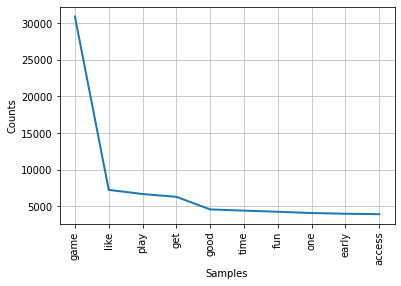

In [14]:
freq, all_rating_tokens = words_frequency(df, 'user_suggestion', 'ProcessTokens', 1)

[('game', 25022), ('get', 6026), ('play', 5107), ('like', 4763), ('time', 4282), ('even', 3657), ('one', 3266), ('player', 3159), ('access', 2960), ('good', 2949), ('early', 2898), ('money', 2832), ('make', 2714), ('would', 2597), ('fun', 2493), ('really', 2399), ('new', 2246), ('want', 2224), ('pay', 2213), ('thing', 2098)]


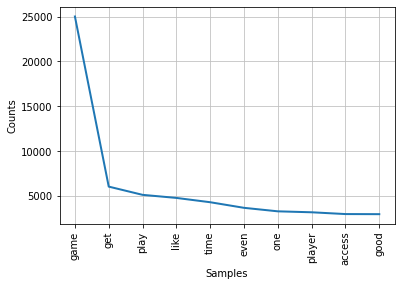

In [15]:
freq, all_rating_tokens = words_frequency(df, 'user_suggestion', 'ProcessTokens', 0)

In [16]:
#define text vectorizers (I used two different ones, later we can decide which one we should continue with)
count_vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer()

In [21]:
#text vectorization with count_vectorizer
def create_vectorized_dataset_count(data):
    list_of_count_vectors = []
    count_vectorizer.fit(data)

    for i in data['ProcessTokens']:
        count_vector = count_vectorizer.transform(i)
        list_of_count_vectors.append(count_vector.toarray())
    data['Count_Vectors'] = list_of_count_vectors   
    return data

df = create_vectorized_dataset_count(df)
#df.head(1)

In [23]:
#text vectorization with tfidf_vectorizer
def create_vectorized_dataset_tfidf(data):
    list_of_tfidf_vectors = []
    tfidf_vectorizer.fit(data)

    for i in data['ProcessTokens']:
        tfidf_vector = tfidf_vectorizer.transform(i)
        list_of_tfidf_vectors.append(tfidf_vector.toarray())
    data['TF-IDF_Vectors'] = list_of_tfidf_vectors   
    return data

df = create_vectorized_dataset_tfidf(df)
#df.head(1)

NOTE: use either Count_Vector or TF-IDF_Vectors column as the input for ML models

Next steps: 
1. define differnet ML models to work with
2. split the dataset (either Count_Vector or TF-IDF_Vectors) into training and testing data
3. fit the training data to the models
4. make predictions

Futher steps:

5. evaluate each model using different evaluation methods (use the testing dataset for this)